In [5]:
import streamlit as st
from datetime import date
import numpy as np
import yfinance as yf
from plotly import graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt

START = "2012-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
#st.title("Crypto Prediction App")
crypto = ("BTC-USD","ETH-USD","LTC-USD","BNB-USD","MATIC-USD","DOT-USD","XRP-USD","HEX-USD","STETH-USD")
#crypto_selection = st.selectbox("Select Crypto for Prediction", crypto)
#n_years = st.slider("Years of Prediction",1,10)
#period = n_years*365

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace = True)
    data = data.drop(['Volume','Adj Close'], axis = 1)
    return data

data = load_data("BTC-USD")

data_training = pd.DataFrame

(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])


from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
data_training_array = scalar.fit_transform(data_training)


x_train = []
y_train = []

for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)  


#ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

[*********************100%***********************]  1 of 1 completed
Epoch 1/50
66/66 [==============================] - 13s 128ms/step - loss: 0.0179
Epoch 2/50
66/66 [==============================] - 9s 133ms/step - loss: 0.0064
Epoch 3/50
66/66 [==============================] - 9s 140ms/step - loss: 0.0053
Epoch 4/50
66/66 [==============================] - 10s 148ms/step - loss: 0.0048
Epoch 5/50
66/66 [==============================] - 10s 147ms/step - loss: 0.0044
Epoch 6/50
66/66 [==============================] - 10s 148ms/step - loss: 0.0046
Epoch 7/50
66/66 [==============================] - 9s 142ms/step - loss: 0.0039
Epoch 8/50
66/66 [==============================] - 9s 142ms/step - loss: 0.0038
Epoch 9/50
66/66 [==============================] - 9s 143ms/step - loss: 0.0033
Epoch 10/50
66/66 [==============================] - 10s 144ms/step - loss: 0.0032
Epoch 11/50
66/66 [==============================] - 10s 146ms/step - loss: 0.0031
Epoch 12/50
66/66 [=============

In [6]:
model.save("keras_model.h5")

In [9]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing,ignore_index=True)
final_df.head()

C:\Users\ajayk\AppData\Local\Temp\ipykernel_32796\3002145197.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


,Close
0,9313.610352
1,9264.813477
2,9162.917969
3,9045.390625
4,9143.582031


In [10]:
input_data = scalar.fit_transform(final_df)
input_data

array([[0.00458327],
       [0.00374944],
       [0.00200828],
       ...,
       [0.3383772 ],
       [0.35011092],
       [0.3393497 ]])

In [12]:
input_data.shape

(1047, 1)

In [14]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(947, 100, 1)
(947,)


In [16]:
# Making Prediction

y_predicted = model.predict(x_test)
y_predicted.shape

30/30 [==============================] - 1s 39ms/step


(947, 1)

In [17]:
y_test

array([0.02615424, 0.02569893, 0.0277538 , 0.02986853, 0.02664008,
       0.02774331, 0.03195914, 0.03450133, 0.03846404, 0.03996469,
       0.0428898 , 0.04067755, 0.04073919, 0.0418643 , 0.03890425,
       0.03951904, 0.04165941, 0.04607964, 0.04905799, 0.06456265,
       0.06699256, 0.06640555, 0.06942194, 0.06810809, 0.06886122,
       0.07875453, 0.07221105, 0.07505783, 0.07691424, 0.08092085,
       0.08017094, 0.07698202, 0.0838139 , 0.08694791, 0.11165922,
       0.11142054, 0.09891013, 0.10994564, 0.10742943, 0.10672178,
       0.11373523, 0.12356076, 0.1242693 , 0.120003  , 0.11807976,
       0.1310754 , 0.14695496, 0.14966507, 0.14988865, 0.16363104,
       0.16398848, 0.15933668, 0.15923619, 0.17193826, 0.16552448,
       0.13850023, 0.13777877, 0.14818541, 0.15604698, 0.18079606,
       0.16673561, 0.17353814, 0.17771279, 0.1649716 , 0.17273738,
       0.17599927, 0.17337647, 0.15850181, 0.16247935, 0.15754229,
       0.15402072, 0.16674685, 0.17253493, 0.17431653, 0.17722

In [18]:
y_predicted

array([[0.0174015 ],
       [0.01721025],
       [0.01703931],
       [0.01688431],
       [0.01674168],
       [0.01661073],
       [0.01648945],
       [0.01637581],
       [0.01627067],
       [0.01617715],
       [0.01610181],
       [0.01605253],
       [0.01603942],
       [0.0160701 ],
       [0.01614988],
       [0.01628265],
       [0.01646793],
       [0.01670255],
       [0.01698253],
       [0.0173059 ],
       [0.01767173],
       [0.01809065],
       [0.01857847],
       [0.01915123],
       [0.01982512],
       [0.02061231],
       [0.02152075],
       [0.02256019],
       [0.02373372],
       [0.02504031],
       [0.02647406],
       [0.02802654],
       [0.02968578],
       [0.03143634],
       [0.03326601],
       [0.03519209],
       [0.03723359],
       [0.03942561],
       [0.04180613],
       [0.04443661],
       [0.04734494],
       [0.0505698 ],
       [0.05415355],
       [0.05818649],
       [0.06267174],
       [0.06753306],
       [0.07266149],
       [0.077

In [19]:
scalar.scale_

array([1.70877552e-05])

In [20]:
scale_factor = 1/1.70877552e-05
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

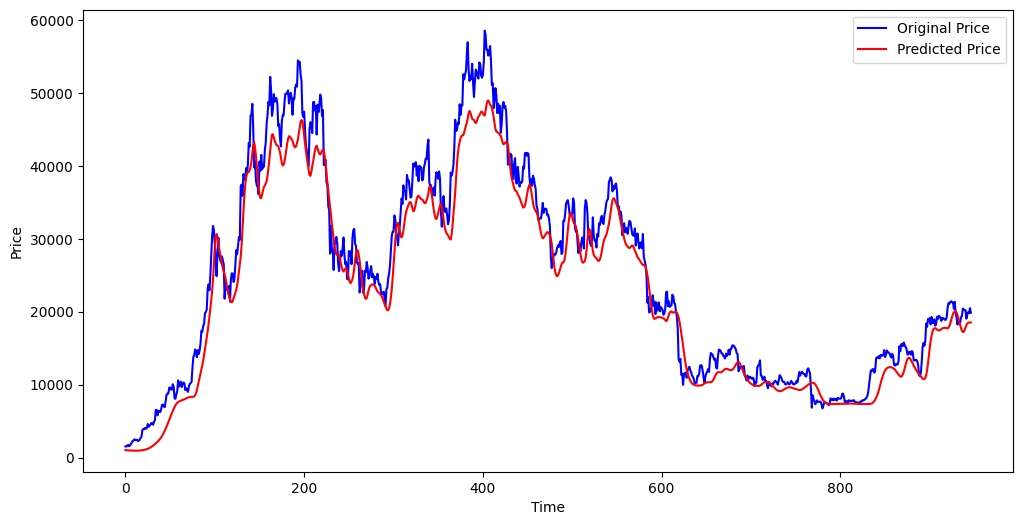

In [21]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()